## Lab 1: Frontogenesis and Frontolysis
In this week's lab, we will be creating upper-air analyses to support our arguments for whether frontogenesis or frontolysis or occurring in a location during the current week.  
<br />
### Note on this Semester
I will be more hands-off this semester with the Jupyter Notebooks in order to help you build confidence in your ability to create plots in Python.  I will continue to provide links to documentation for functions that will be useful for the lab, but I will not be giving step-by-step instructions on how to generate the maps.  In many cases, the data-processing and map creation codes you wrote last semester can be used for similar tasks this semester, and I encourage you to consult those labs as needed and to use these coding practices in the codes you generate this semester.  I will be available for questions if you have any issues writing your code, and I will occasionally give a short tutorial on a new function at the start of a lab's Notebook.
<br />
### Useful Documentation
1. Xarray open_dataset:  https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html
2. Matplotlib Contour: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
3. Cartopy Feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
4. MetPy Units: https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html
5. Datetime: https://docs.python.org/3/library/datetime.html
6. MetPy Frontogenesis: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.frontogenesis.html
7. MetPy Potential Temperature: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html#metpy.calc.potential_temperature
8. MetPy Lat Lon Grid Deltas: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.lat_lon_grid_deltas.html#metpy.calc.lat_lon_grid_deltas

### Tutorial
This week's, we wish to calculate frontogenesis using equation 19 from the lecture notes.  Luckily for us, however, MetPy has a function that can do this for us.  To start this week's lab, I'll give a short tutorial on how to use this frontogenesis function.

<br />

1. Below, you are given some sample data.  To calculate frontogenesis, we need potential temperature, the u- and v-wind components, and the distance between our grid points.  However, many model datasets (such as the GFS data we will use in this lab) only include temperature, wind components, pressure, latitude, and longitude, meaning that we need to use these variables to compute the ones we need.  Thus, for illustrative purposes, our sample data mimics what we would have from a GFS file.

In [1]:
import numpy as np
from metpy.units import units

temperature = np.array([[273, 273, 273],
                        [274, 274, 274],
                        [275, 275, 275]]) * units.kelvin

pressure = np.array([[100000, 100000, 100000],
                     [99990, 99990, 99990],
                     [99980, 99980, 99980]]) * units.pascal

u_wind = np.array([[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]]) * units.mps

v_wind = np.array([[-1, -1, -1],
                   [-2, -2, -2],
                   [-3, -3, -3]]) * units.mps

latitude = np.array([[41, 41, 41],
                     [40, 40, 40],
                     [39, 39, 39]])


longitude = np.array([[-100, -99, -98],
                      [-100, -99, -98],
                      [-100, -99, -98]])

<br /><br />

2. Since our frontogenesis equation requires potential temperature, we first need to use MetPy's potential temperature function to calculate potential temperature. Note how the input pressure variable has units associated with it - which units these are (e.g., Pa vs. hPa or mb) does not matter so long as the data contain the unit.

<br />

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MetPy calc.potential_temperature Documentation: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html#metpy.calc.potential_temperature


In [2]:
import metpy.calc as calc

potential_temperature = calc.potential_temperature(pressure, temperature)
potential_temperature

array([[273.        , 273.        , 273.        ],
       [274.00782907, 274.00782907, 274.00782907],
       [275.01571631, 275.01571631, 275.01571631]]) <Unit('kelvin')>

<br /><br />

3. Next, we need to find the distance (in meters) between our grid points.  MetPy has a function for that as well, which takes the latitude and longitude information as input.

<br />

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MetPy calc.lat_lon_grid_deltas Documentation: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.lat_lon_grid_deltas.html#metpy.calc.lat_lon_grid_deltas

In [3]:
dx, dy = calc.lat_lon_grid_deltas(longitude, latitude)
dx

array([[83919.37843502, 83919.37843502],
       [85179.76884051, 85179.76884051],
       [86414.21309308, 86414.21309308]]) <Unit('meter')>

<br /><br />

4. Now that we have all of the prerequisite data, we are ready to calculate frontogenesis using MetPy.

<br />

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MetPy calc.frontogenesis Documentation: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.frontogenesis.html

In [4]:
frontogenesis = calc.frontogenesis(potential_temperature, u_wind, v_wind, dx=dx, dy=dy)
frontogenesis

array([[-8.15088594e-11, -8.15088594e-11, -8.15088594e-11],
       [-8.15135631e-11, -8.15135631e-11, -8.15135631e-11],
       [-8.15182667e-11, -8.15182667e-11, -8.15182667e-11]]) <Unit('kelvin * meter_per_second / meter ** 2')>

<br /><br />

### Instructions
So you can complete this week's lab, I've downloaded the 1200 UTC 8 February 2023 GFS forecast ranging from 1200 UTC 8 February 2023 (the 0-h analysis) to 1200 UTC 15 February 2023 (168-h forecast) at 6-h intervals.  The location of these data is provided for you below, as is the filenaming convention if you wish to use a datetime object to select your time of interest.

Using the downloaded GFS data, find an area of frontogenesis or frontolysis that is analyzed or is predicted by the model to occur.  Generate charts of color filled frontogenesis, isotherms, and wind barbs at 925 hPa, 850 hPa, and/or 700 hPa at two or more consecutive 6-h times to help support your reasoning.  Be sure your maps follow the "good map" guidelines, and don't forget to import the necessary packages before you start coding.

In [5]:
#Import needed modules
from datetime import datetime
from metpy.io import add_station_lat_lon
from metpy.plots import StationPlot, sky_cover
import numpy as np
import cartopy.crs as crs 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xarray as xr
from siphon.simplewebservice.iastate import IAStateUpperAir
import sys
from metpy.units import units
import metpy.calc as calc
import pandas as pd

In [6]:
#location of the data
data_location = "/data/AtmSci360/Synp2/Lab_1/"

In [7]:
#Function to grab data and put temp/wind in proper units for mapping
def process_upper_air_data(time):
  
    model_data = xr.open_dataset(f"{data_location}{time:%m%d%y_%H}_gfs.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
    

    model_data['t'] = model_data["t"].metpy.convert_units('degC')
    model_data['u'] = model_data["u"].metpy.convert_units('kt')
    model_data['v'] = model_data["v"].metpy.convert_units('kt')
    
    
    return model_data

In [8]:
#Calculate frontogenesis at 700mb at the specifed time from model_data and return it for plotting later
def frontogenesis(model_data):
    
    model_data = model_data.sel(isobaricInhPa = 700)
    
    
    pressure = 70000*units.pascal
    temp=model_data['t']
    potential_temperature = calc.potential_temperature(pressure,temp)
    dx, dy = calc.lat_lon_grid_deltas(model_data['longitude'], model_data['latitude'])
    u_wind=model_data['u'].metpy.convert_units('mps')
    v_wind=model_data['v'].metpy.convert_units('mps')
    
    
    frontogen = calc.frontogenesis(potential_temperature, u_wind, v_wind, dx=dx, dy=dy)
    fronto=frontogen.values
    
    
    return fronto

In [9]:
#Plotting function using model_data,time,and fronto variables
def gfs_upper_air_plot(model_data, time,fronto):
    
    
    model_data = model_data.sel(isobaricInhPa = 700)
    
    proj = crs.LambertConformal(central_longitude=-95, central_latitude=35, standard_parallels=[27.5,42.5])
    
    fig = plt.figure(figsize=(11.5,8),dpi=300)
    ax = plt.subplot(projection = proj)
    ax.set_extent((-125, -65, 23, 60))

    ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)

    

   
    smooth_temp = gaussian_filter(model_data["t"].values,2)
    cont_t=plt.contour(model_data["longitude"].values, model_data["latitude"].values,smooth_temp,np.arange(-35,32,2),colors='r',linewidths = 0.5, linestyles="solid",transform=crs.PlateCarree(), alpha=0.8, zorder=1)
    ax.clabel(cont_t, cont_t.levels,fmt=lambda v: format(v, '.0f'),inline=True,fontsize=6)
    
    smooth_front = gaussian_filter(fronto, 2)
    cont_front = plt.contourf(model_data["longitude"].values, model_data["latitude"].values, smooth_front, np.arange(0,10**-8,2*10**-9), cmap="BuPu", transform=crs.PlateCarree(), extend="max", alpha=0.6)
    cbar = plt.colorbar(cont_front,fraction=0.046, pad=0.04)
    cbar.set_label(("Frontogenesis K ms$^{-1}$/m$^{2}$"), size=10, weight="bold")

 
    wind_slice_x = slice(None, None, 12)
    wind_slice_y = slice(None, None, 12)
    
  
    ax.barbs(model_data["longitude"][wind_slice_x].values, model_data["latitude"][wind_slice_y].values,
             model_data["u"][wind_slice_x, wind_slice_y].values,
             model_data["v"][wind_slice_x, wind_slice_y].values,
             color='black',transform=crs.PlateCarree(),linewidth=0.6,length=4.25)
    
   
    plt.title("700 hpa Oberservations, Temperature (red| C), Frontogenesis (shaded|K ms$^{-1}$/m$^{2}$), Wind (barbs| kts)",size=6,weight="bold",loc="left")
    plt.title(f"Valid: {time:%m/%d/%Y %H%M} UTC", size=5, loc="right") 
              
    
    
    plt.show()


skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/dataset.py", line 609, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        

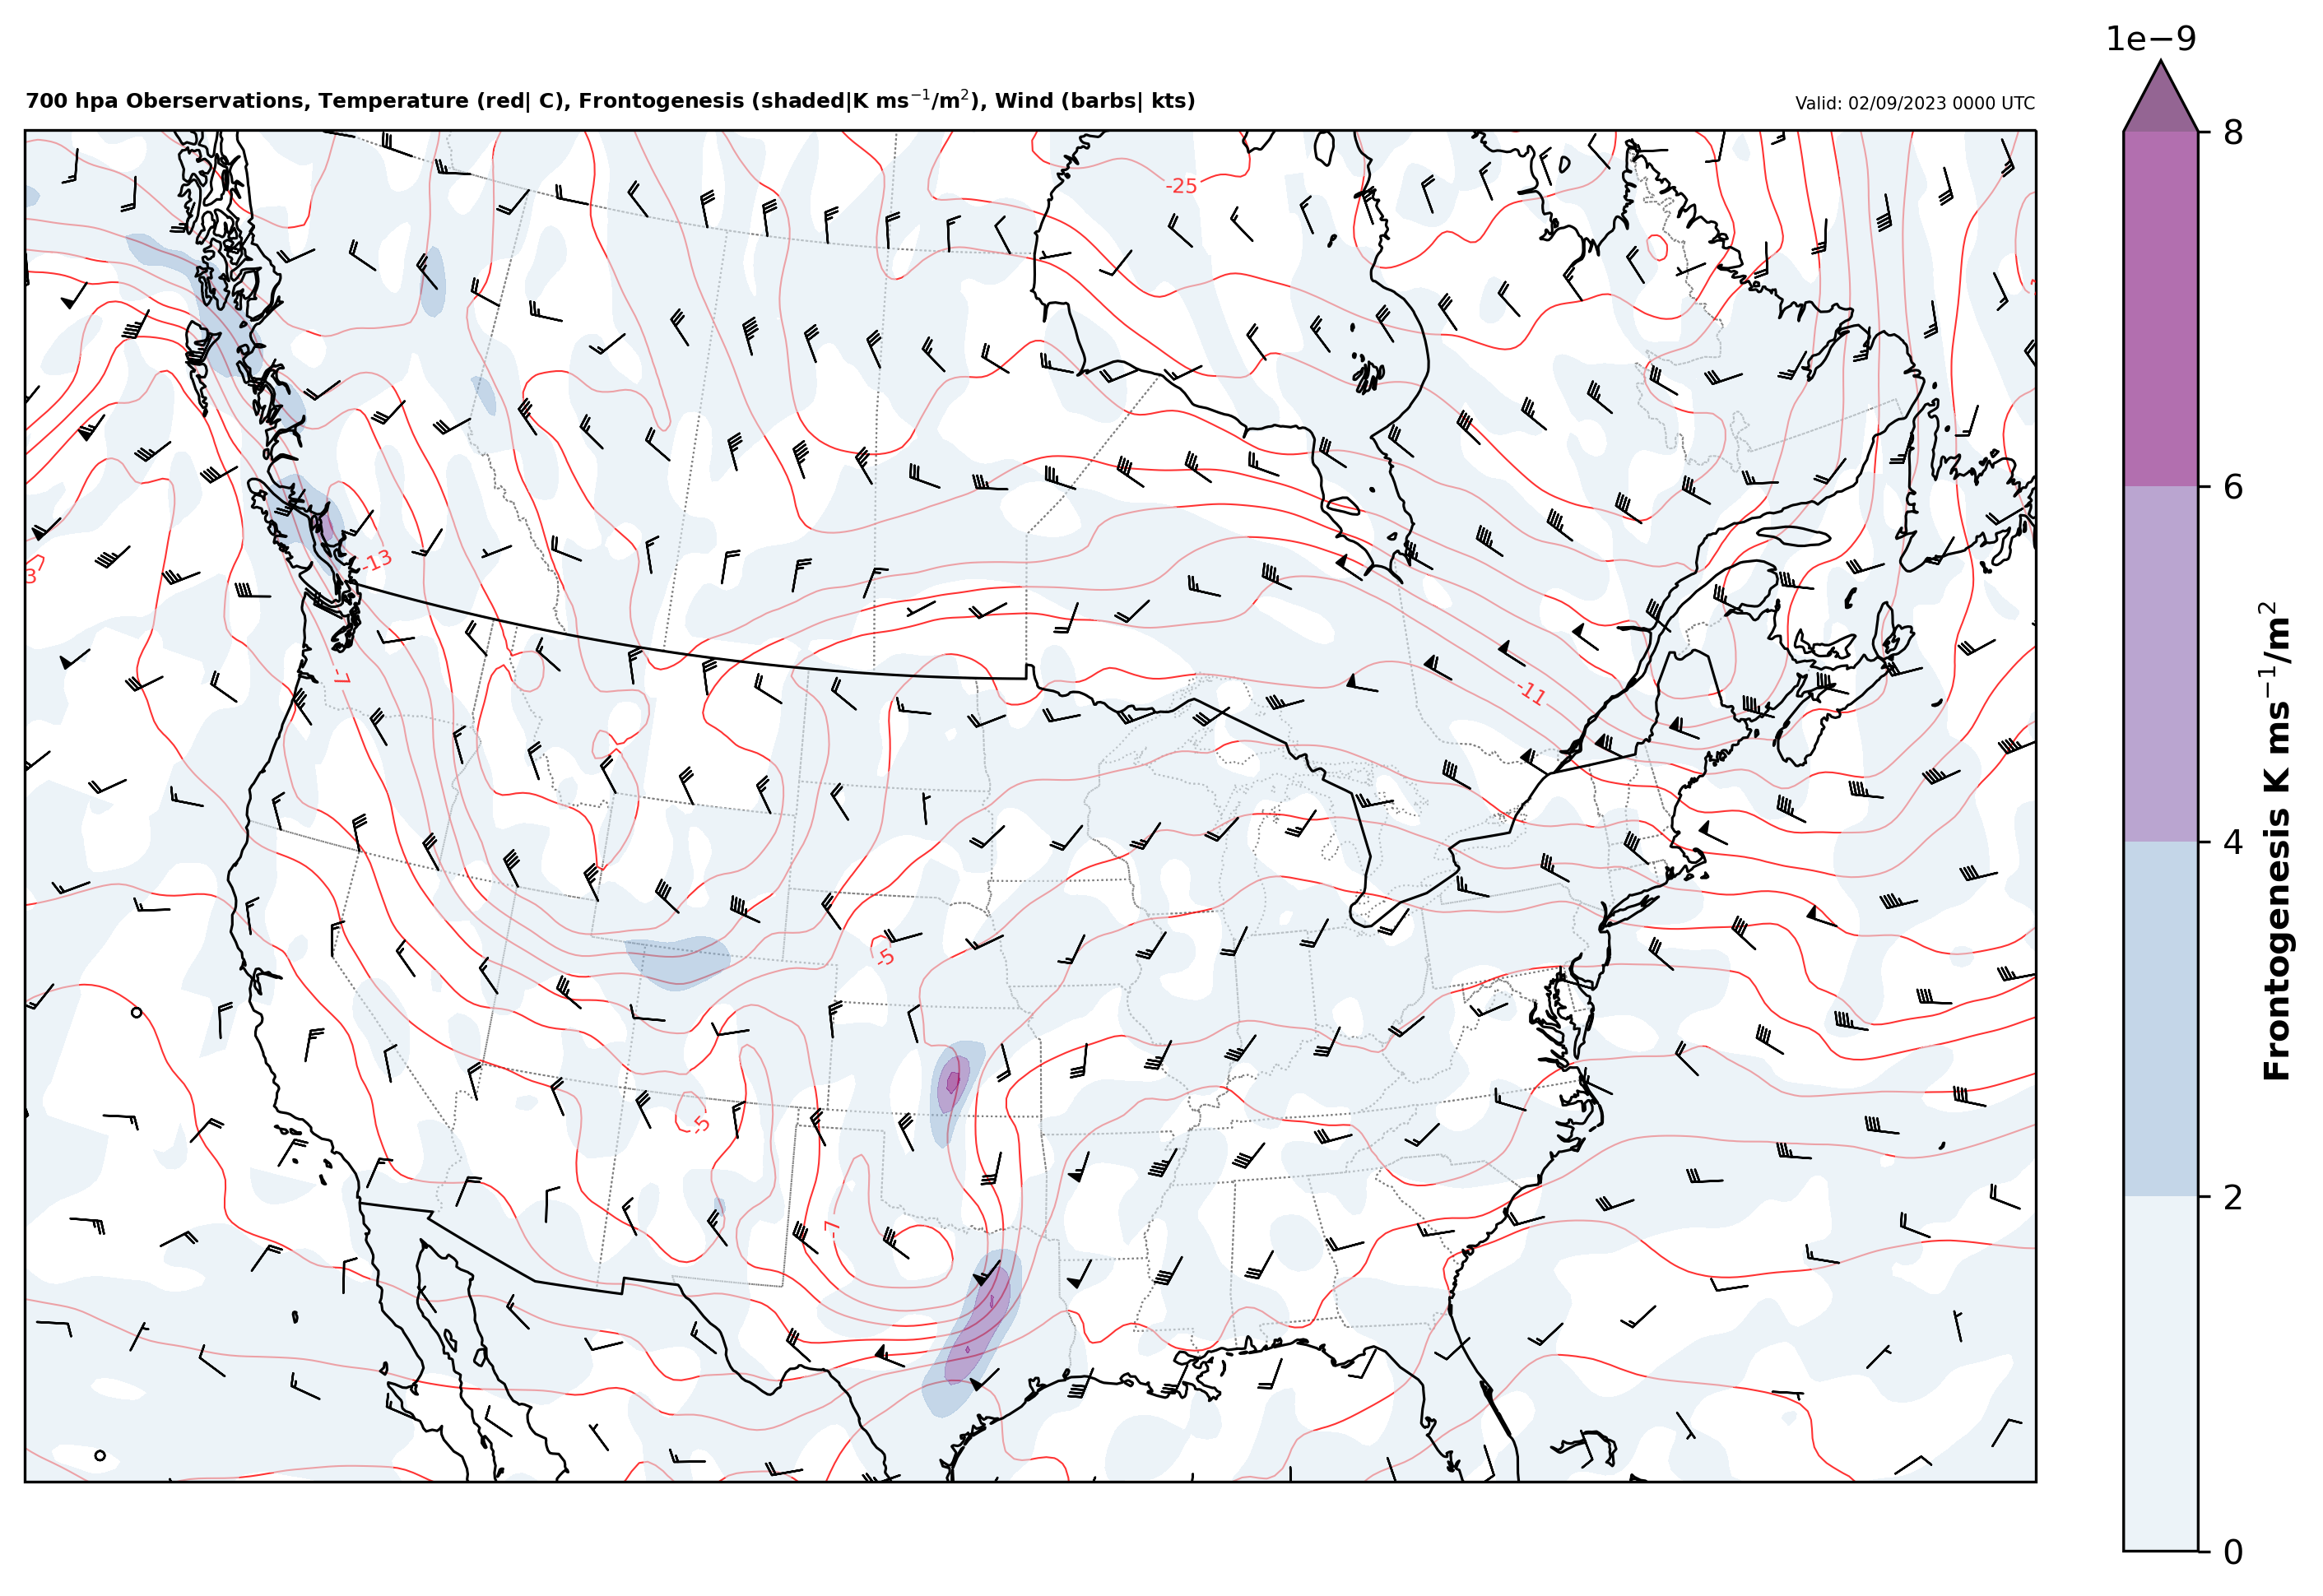

Can't create file '/data/AtmSci360/Synp2/Lab_1/020923_06_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_1/020923_06_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_1/020923_06_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

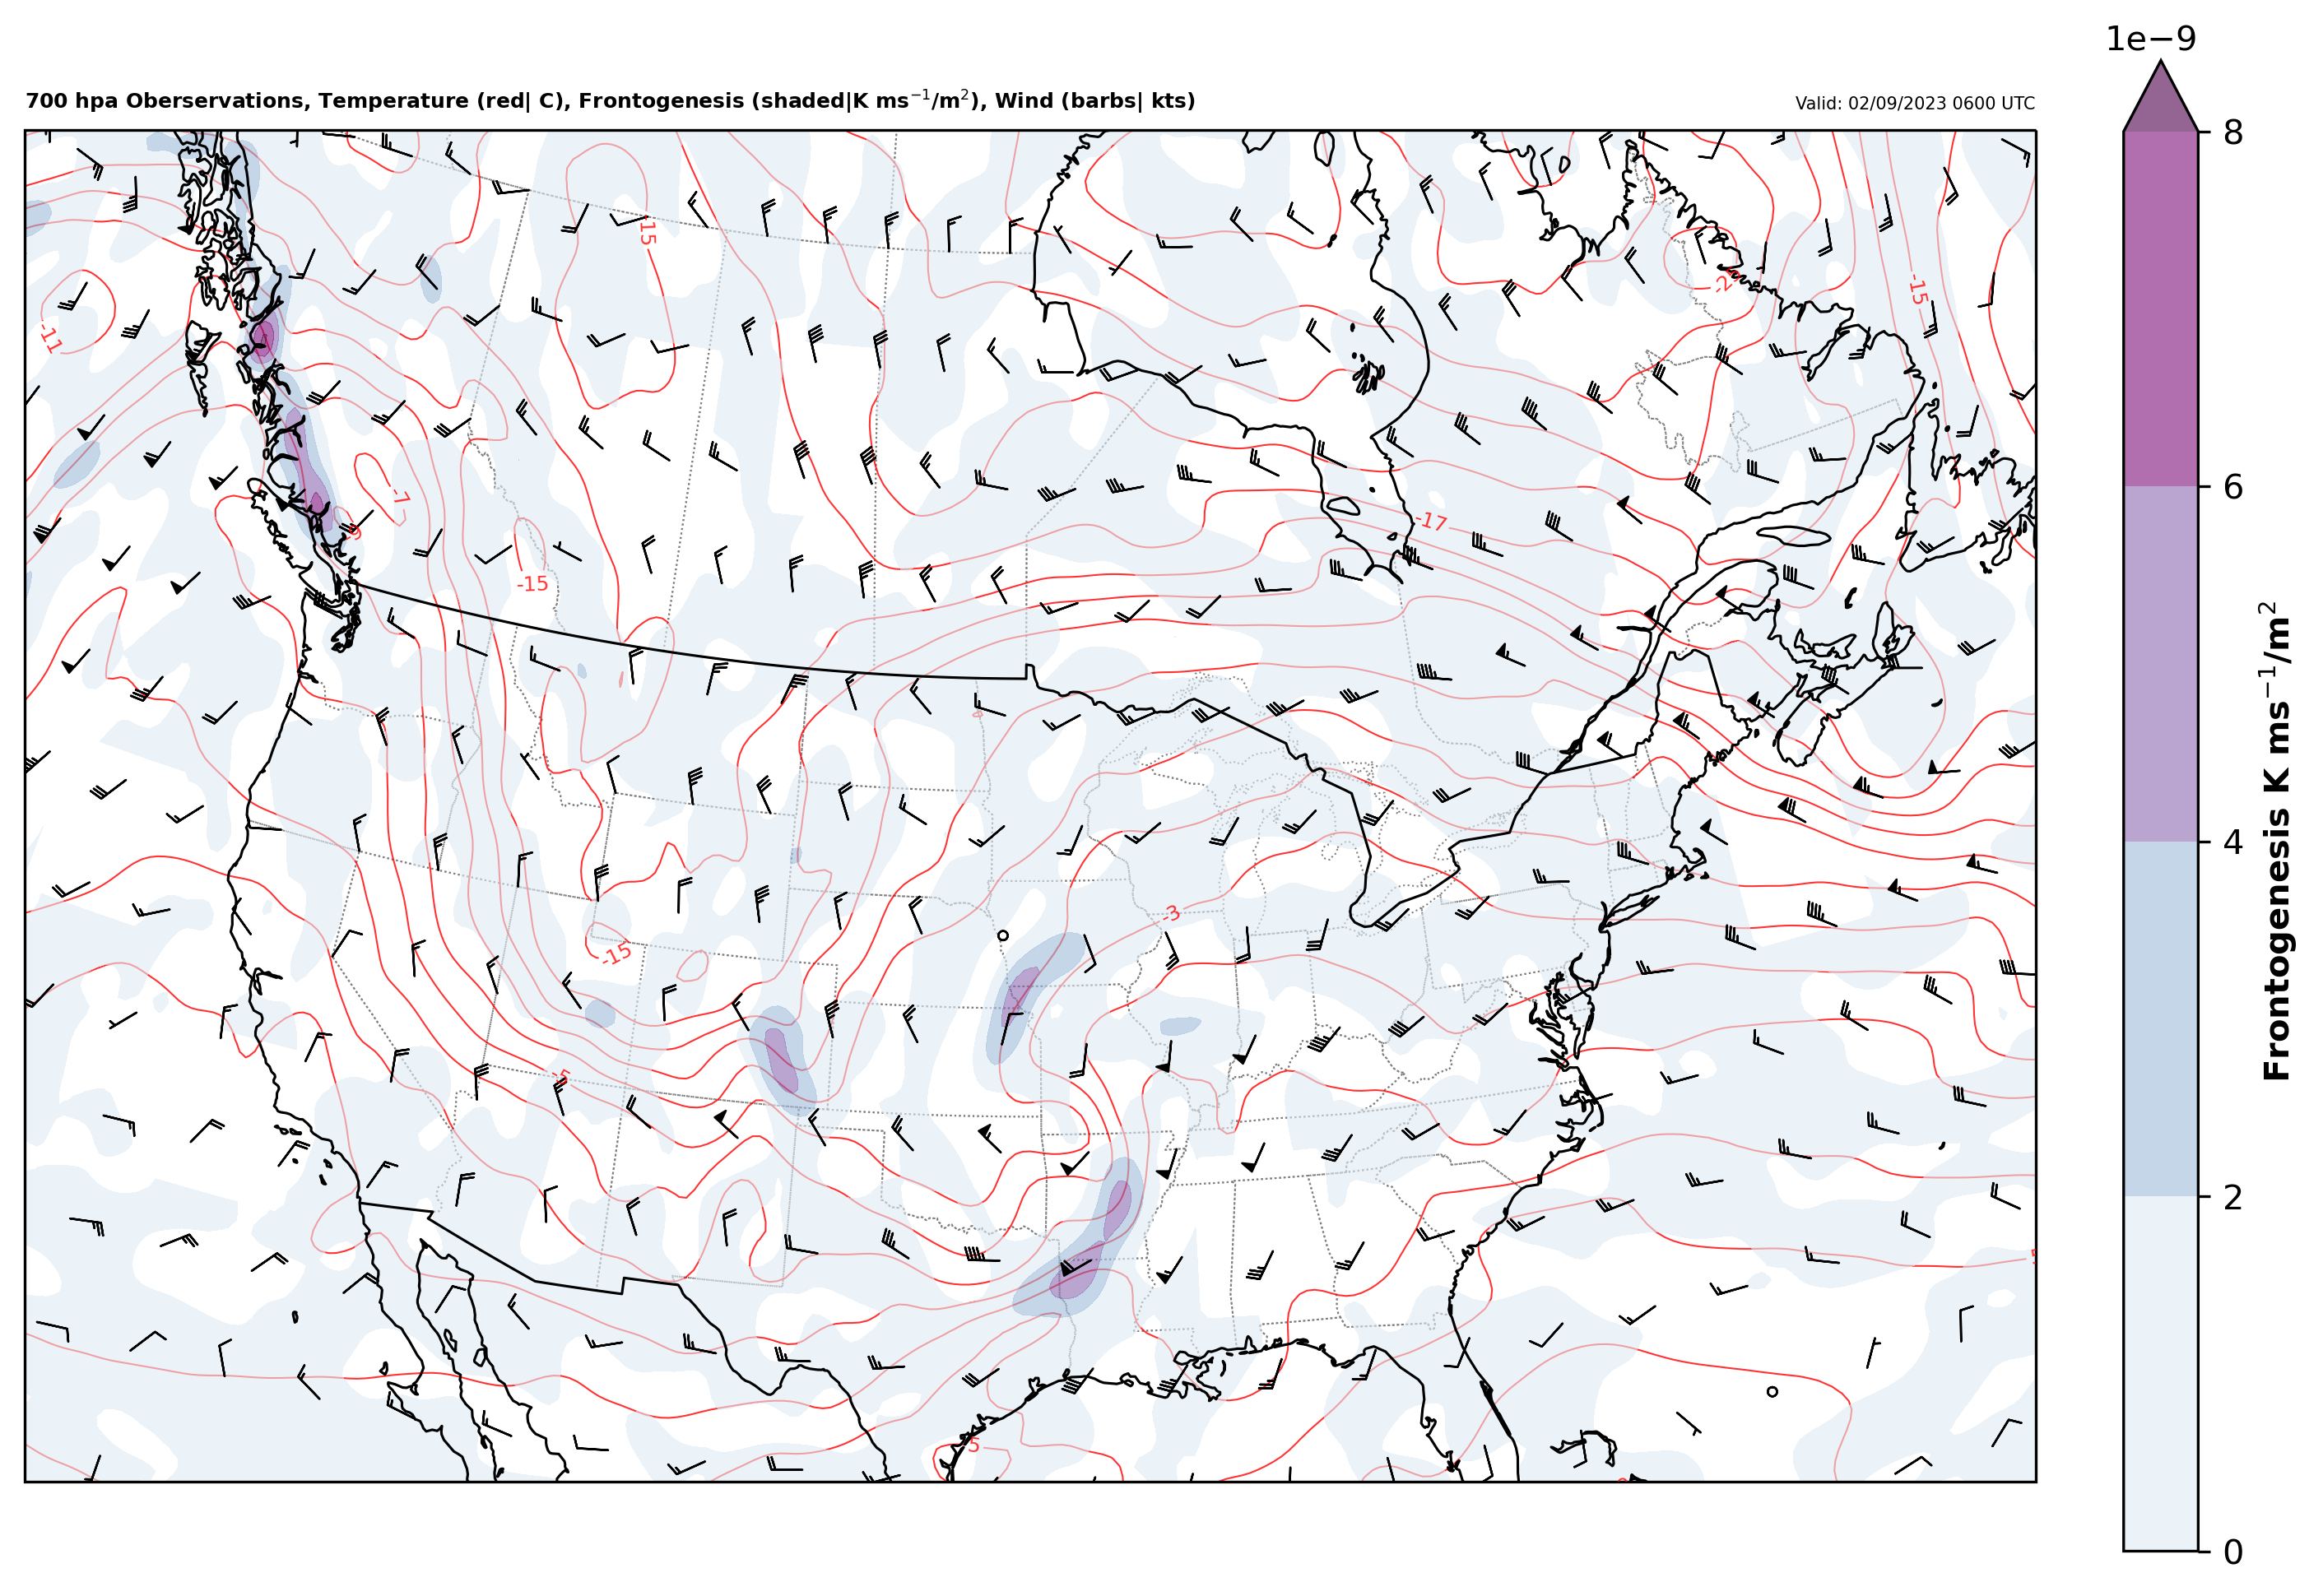

In [10]:
#Call functions to create maps
time = datetime(2023,2,9,0)
model_data=process_upper_air_data(time)
fronto=frontogenesis(model_data)
gfs_upper_air_plot(model_data, time,fronto)

time = datetime(2023,2,9,6)
model_data=process_upper_air_data(time)
fronto=frontogenesis(model_data)
gfs_upper_air_plot(model_data, time,fronto)

Can't create file '/data/AtmSci360/Synp2/Lab_1/020923_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_1/020923_12_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_1/020923_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

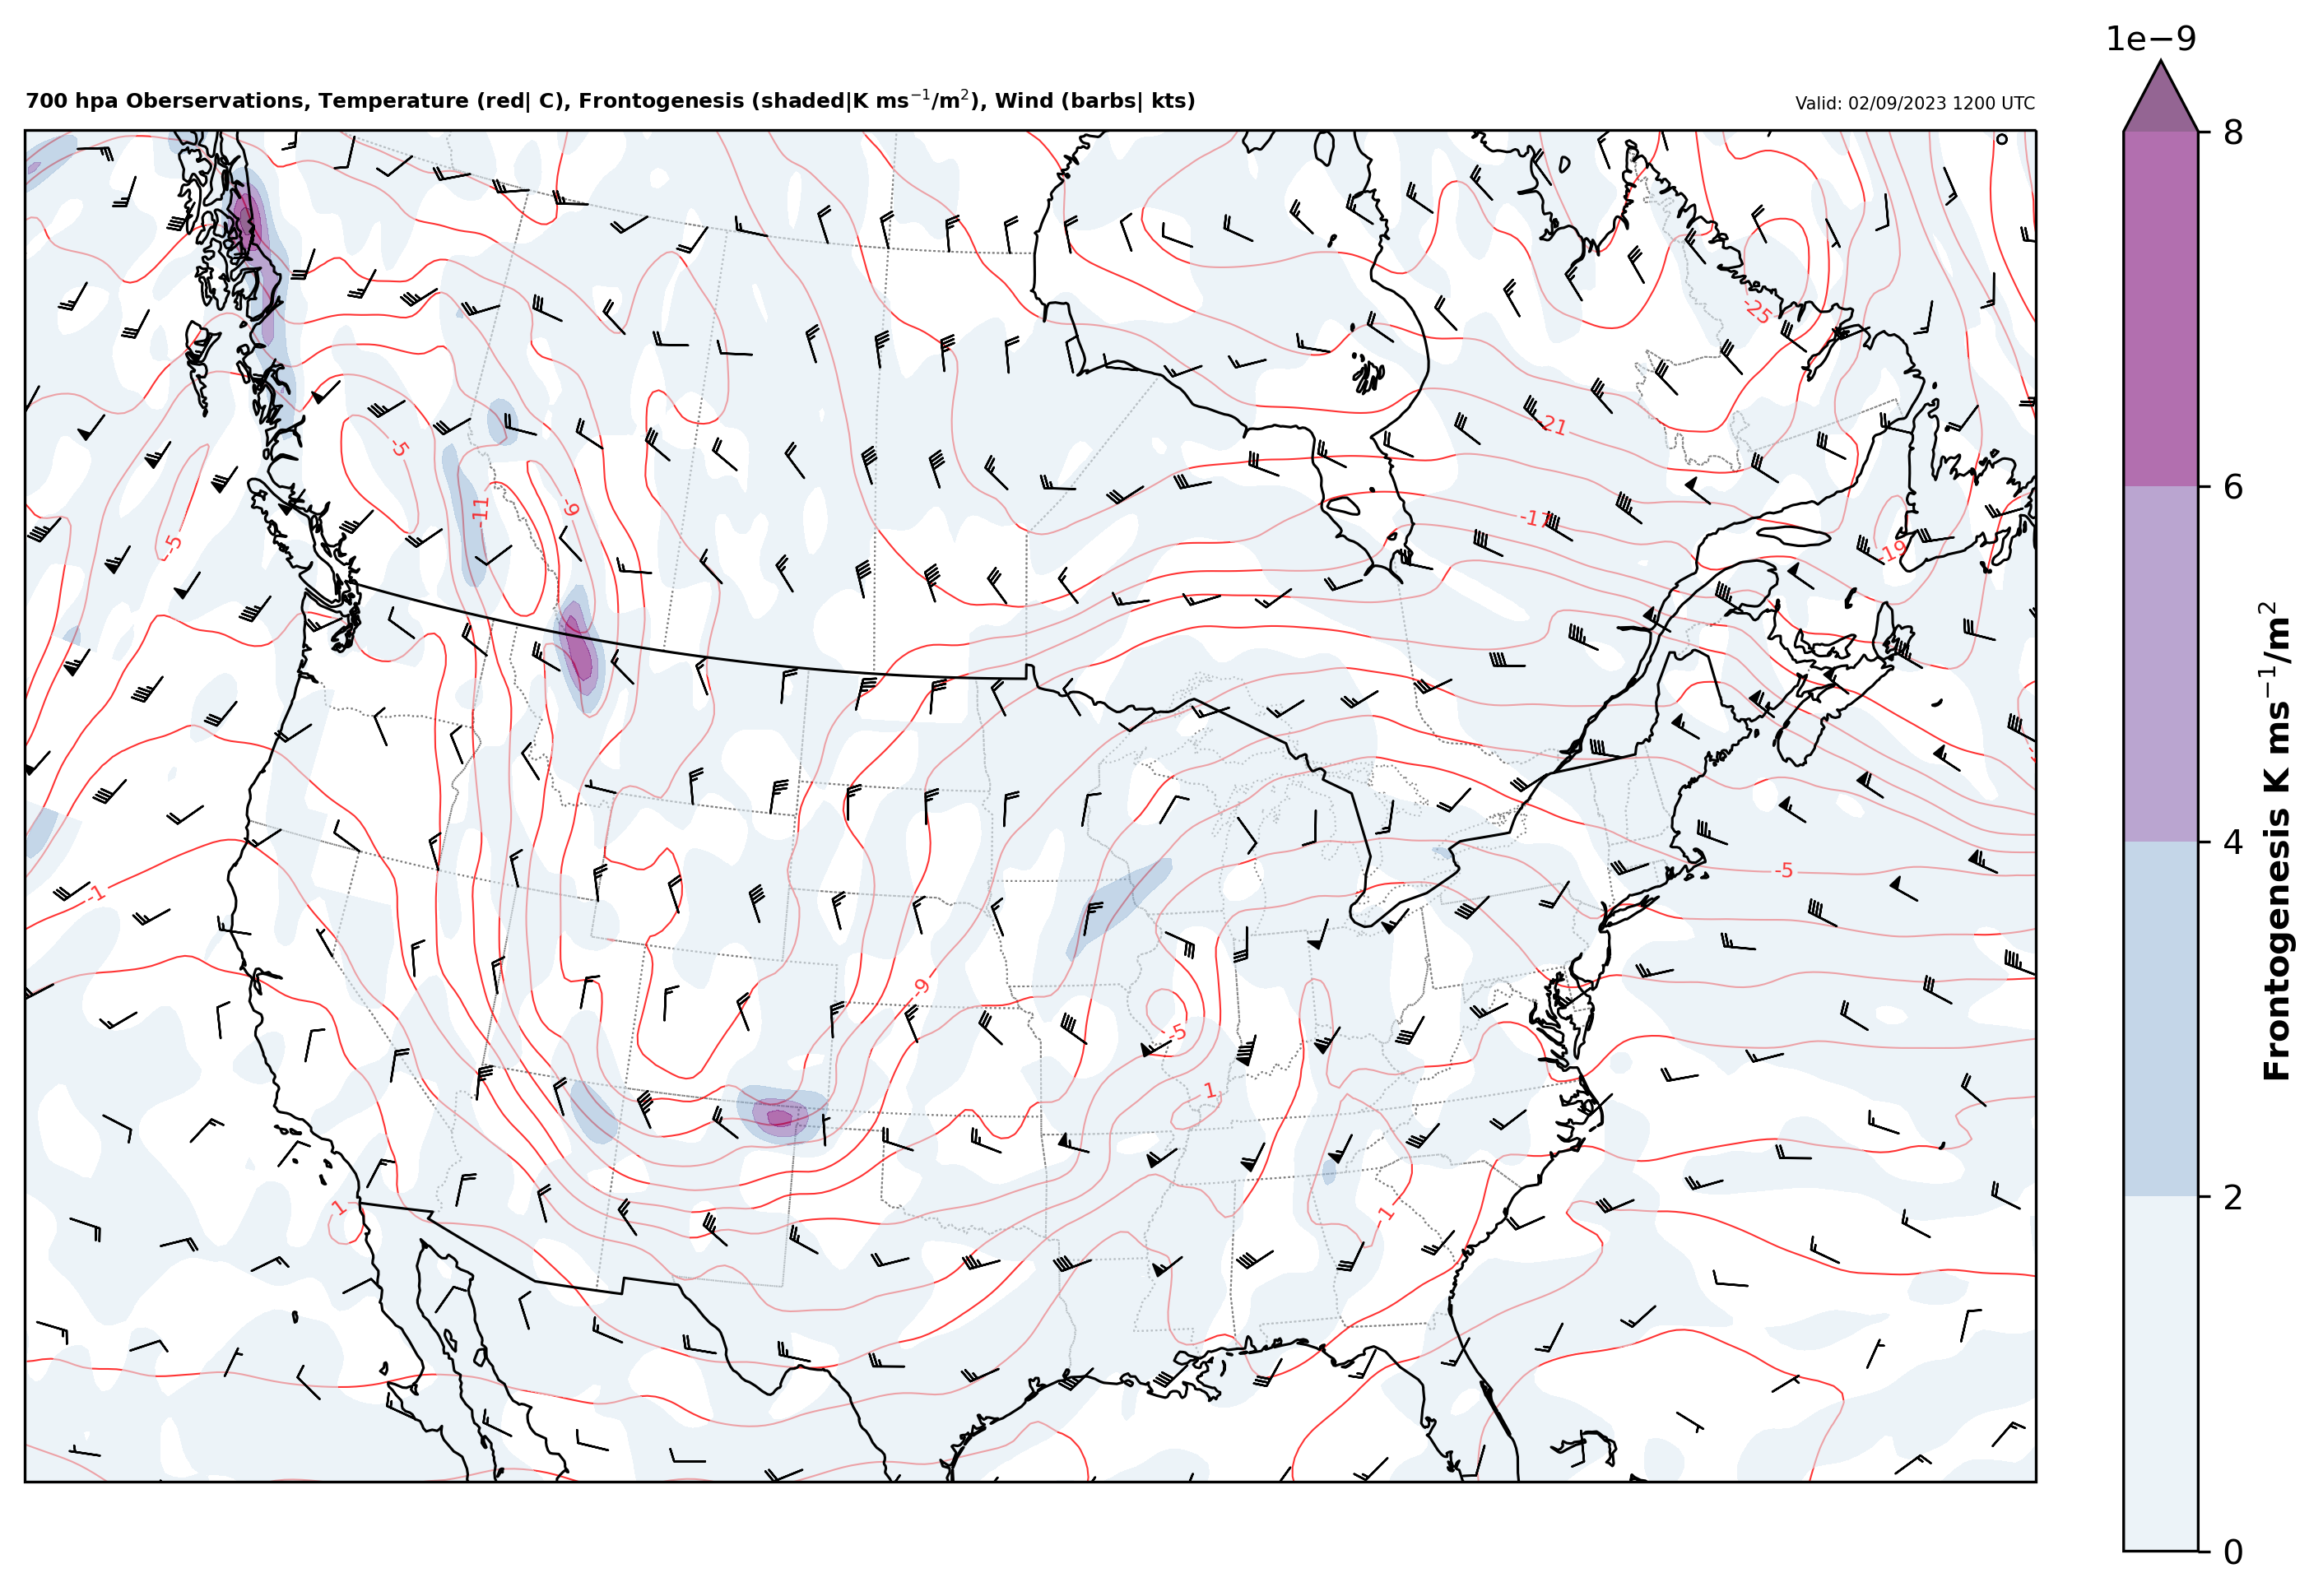

Can't create file '/data/AtmSci360/Synp2/Lab_1/020923_18_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_1/020923_18_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_1/020923_18_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

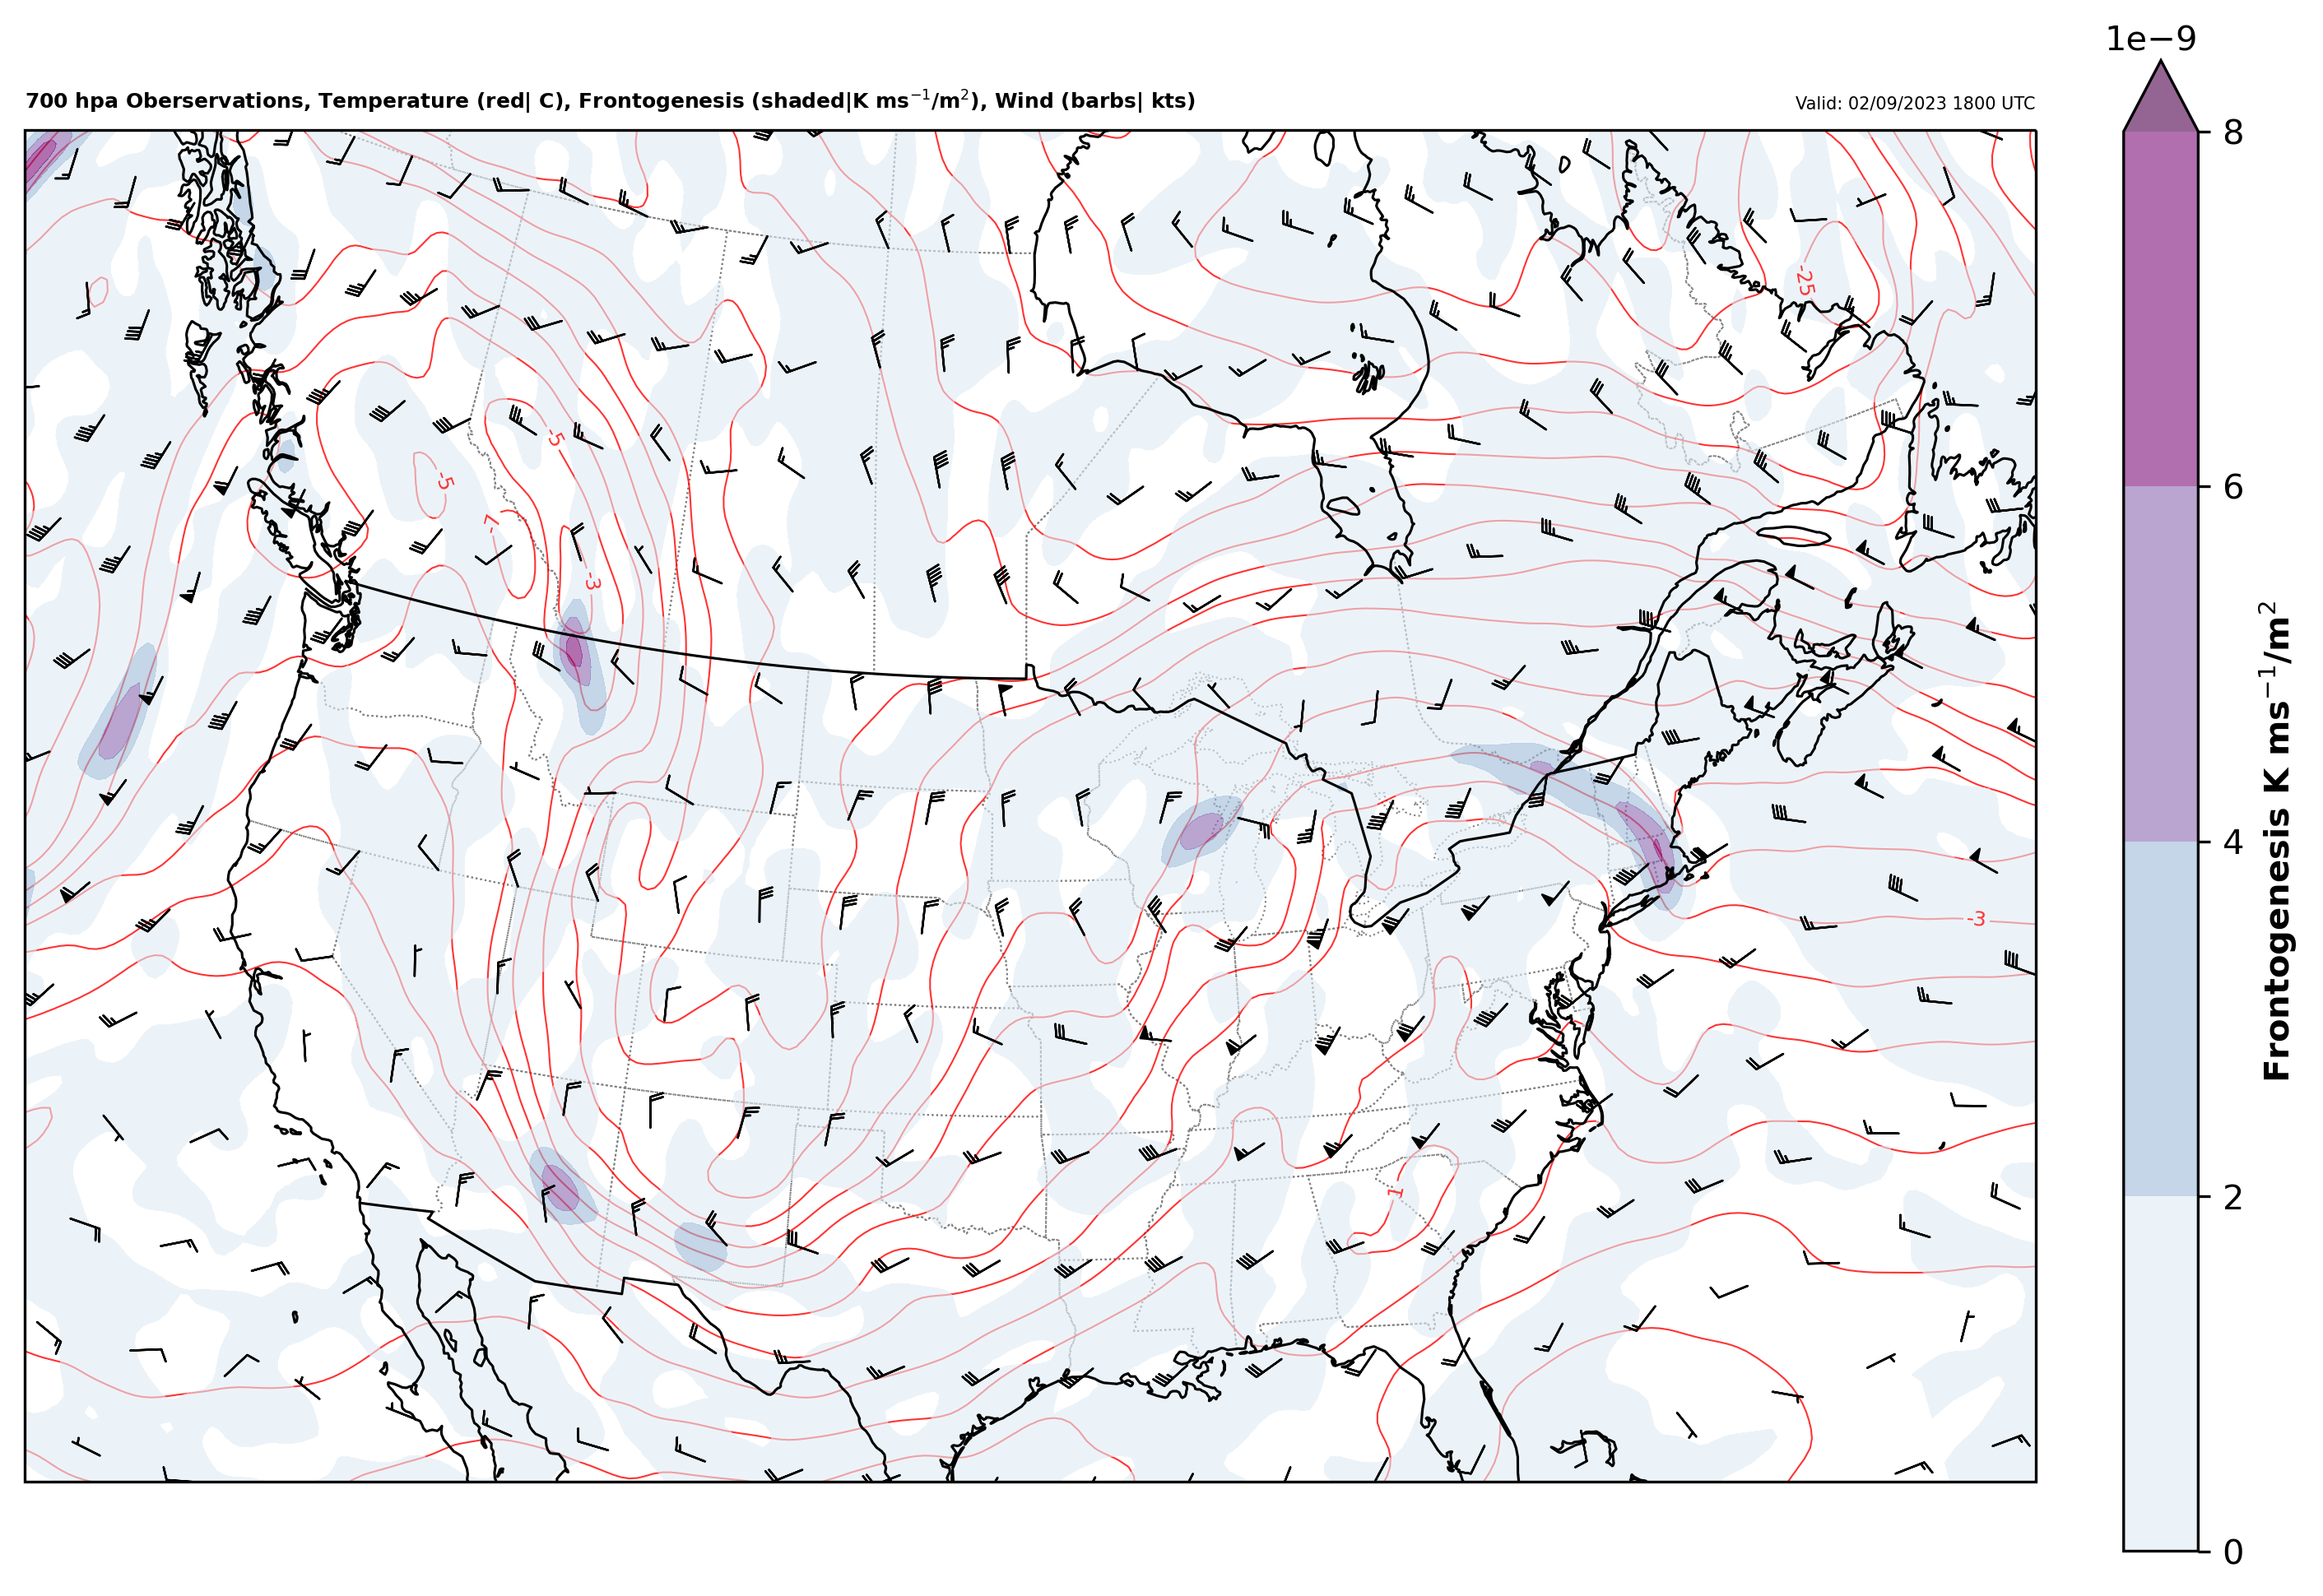

In [11]:
#Same as previous block but for 12z and 18z
time = datetime(2023,2,9,12)
model_data=process_upper_air_data(time)
fronto=frontogenesis(model_data)
gfs_upper_air_plot(model_data, time,fronto)

time = datetime(2023,2,9,18)
model_data=process_upper_air_data(time)
fronto=frontogenesis(model_data)
gfs_upper_air_plot(model_data, time,fronto)